In [36]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
sns.set_theme()
from models import NCF
from evaluators import eval_results
import numpy as np
import torch
# import matplotlib.pyplot as plt
# import seaborn as sns

emb_size = 128  # lATENT SPACE FOR EACH USER AND ITEM
hidden_layers = np.array([emb_size, 64, 32, 16])
output_size = 1  # OUTPUT PREDICTION SCORE BETWEEN [0, 1]
n_careers = 17  # len(dataset.tensors[1].unique())
n_users = 6040  # NUMBER OF USERS IN DATA
device = torch.device("cpu")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [37]:
ncf = NCF(6040, n_careers, emb_size, hidden_layers, output_size).to(device)
ncf.load_state_dict(torch.load("output/unfair_NCF"))

eval_results(model=ncf, n_items=n_careers, n_samples= 15, k =5, mode='CAREERS', note='UNFAIR NCF', fairness=True, device=device)

-- (UNFAIR NCF)
Hr: 0.6517615176151762
ndcg:0.47155227279074197
 
average differential fairness:  0.136
absolute unfairness:  0.015


In [38]:
nfcf = NCF(6040, n_careers, emb_size, hidden_layers, output_size).to(device)
ncf.load_state_dict(torch.load("output/NFCF_lmbda_1"))

eval_results(model=ncf, n_items=n_careers,n_samples= 15, k=5,  mode='CAREERS', note='FAIR NCF', fairness=True, device=device)

-- (FAIR NCF)
Hr: 0.6443089430894309
ndcg:0.4669180139446435
 
average differential fairness:  0.135
absolute unfairness:  0.022


In [39]:
nfcf5 = NCF(6040, n_careers, emb_size, hidden_layers, output_size).to(device)
ncf.load_state_dict(torch.load("output/NFCF_lmbda_3"))

eval_results(model=ncf, n_items=n_careers, n_samples=15, mode='CAREERS', k=5, note='FAIR NCF', fairness=True, device=device)

-- (FAIR NCF)
Hr: 0.6388888888888888
ndcg:0.4596775637198366
 
average differential fairness:  0.146
absolute unfairness:  0.024


In [40]:
nfcf5 = NCF(6040, n_careers, emb_size, hidden_layers, output_size).to(device)
ncf.load_state_dict(torch.load("output/NFCF_lmbda_5"))

eval_results(model=ncf, n_items=n_careers, n_samples=15, mode='CAREERS', k=5, note='FAIR NCF', fairness=True, device=device)

-- (FAIR NCF)
Hr: 0.6361788617886179
ndcg:0.4561622406389389
 
average differential fairness:  0.147
absolute unfairness:  0.020


Text(0.5, 1.0, 'Hit Ratio')

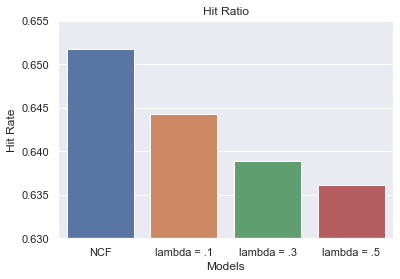

In [55]:
hr = [0.6517615176151762, 0.6443089430894309, 0.6388888888888888,0.6361788617886179 ]
ndcg = [0.47155227279074197, 0.4669180139446435, 0.4596775637198366, 0.4561622406389389]
edf = [0.136,0.135,0.146,0.147]
u_abs = [0.015, .022, .024, 0.20]

labels = ['NCF', 'lambda = .1', 'lambda = .3', 'lambda = .5']
df = pd.DataFrame({'Models':labels, 'Hit Rate': hr, 'NDCG': ndcg, 'edf':edf,'u_abs':u_abs})
sns.barplot(data=df, x='Models', y='Hit Rate')
plt.ylim(.63, .655)
plt.title('Hit Ratio')

Text(0.5, 1.0, 'Discounted Cumulative Gain')

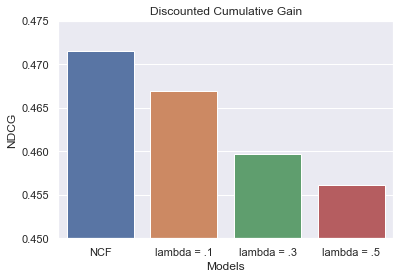

In [53]:
sns.barplot(data=df, x='Models', y='NDCG')
plt.ylim(.45, .475)
plt.title('Discounted Cumulative Gain')

Text(0.5, 1.0, 'Discounted Cumulative Gain')

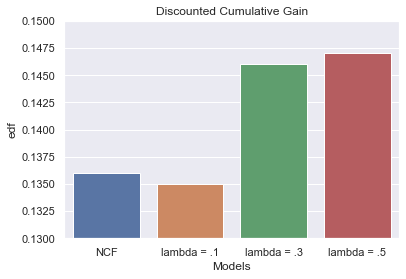

In [56]:
sns.barplot(data=df, x='Models', y='edf')
plt.ylim(.13, .15)
plt.title('Differential Fairness')

Text(0.5, 1.0, 'Absolute Fairness')

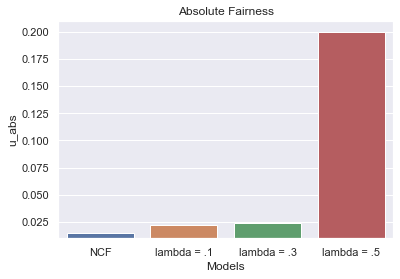

In [60]:
sns.barplot(data=df, x='Models', y='u_abs')
plt.ylim(.01, .21)
plt.title('Absolute Fairness')

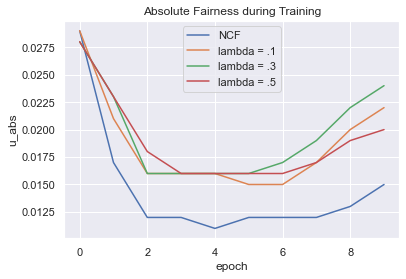

In [41]:
# NCF (BASELINE)
edf = [
    0.198,
    0.161,
    0.136,
    0.127,
    0.125,
    0.125,
    0.126,
    0.129,
    0.135,
    0.136
]
u_abs = [
    0.029,
    0.017,
    0.012,
    0.012,
    0.011,
    0.012,
    0.012,
    0.012,
    0.013,
    0.015
]
df = pd.DataFrame({'epoch':range(10), 'edf':edf, 'u_abs':u_abs})

sns.lineplot(data=df, x='epoch', y='u_abs', markers=True, dashes=False)
# sns.lineplot(data=df, x='epoch', y='edf', markers=True, dashes=False)

#LAMBDA = 0.1
edf = [
    0.200,
    0.172,
    0.147,
    0.135,
    0.135,
    0.131,
    0.129,
    0.126,
    0.136,
    0.135
]
u_abs = [
    0.029,
    0.021,
    0.016,
    0.016,
    0.016,
    0.015,
    0.015,
    0.017,
    0.020,
    0.022
]
df = pd.DataFrame({'epoch':range(10), 'edf':edf, 'u_abs':u_abs})

sns.lineplot(data=df, x='epoch', y='u_abs', markers=True, dashes=False)
# sns.lineplot(data=df, x='epoch', y='edf', markers=True, dashes=False)

# LAMBDA = 0.3
edf = [
    0.225,
    0.179,
    0.162,
    0.148,
    0.142,
    0.140,
    0.142,
    0.139,
    0.146,
    0.146
]
u_abs = [
    0.028,
    0.023,
    0.016,
    0.016,
    0.016,
    0.016,
    0.017,
    0.019,
    0.022,
    0.024
]
df = pd.DataFrame({'epoch':range(10), 'edf':edf, 'u_abs':u_abs})

sns.lineplot(data=df, x='epoch', y='u_abs', markers=True, dashes=False)
# sns.lineplot(data=df, x='epoch', y='edf', markers=True, dashes=False)

#LAMBDA = 0.5
edf = [
    0.234,
    0.180,
    0.168,
    0.151,
    0.147,
    0.141,
    0.138,
    0.141,
    0.145,
    0.147
]
u_abs = [
    0.028,
    0.023,
    0.018,
    0.016,
    0.016,
    0.016,
    0.016,
    0.017,
    0.019,
    0.020
]
df = pd.DataFrame({'epoch':range(10), 'edf':edf, 'u_abs':u_abs})

sns.lineplot(data=df, x='epoch', y='u_abs', markers=True, dashes=False, legend='full')
# sns.lineplot(data=df, x='epoch', y='edf', markers=True, dashes=False, legend='full')

plt.title('Absolute Fairness during Training')
# plt.title('Average Differential Fairness during Training')
plt.legend(labels)
plt.show()


In [42]:
# from data import load_data
#
# data = load_data()
# inps, tgts = data.tensors
#
# users, items = inps[:, 0], inps[:, 1]
# unique_users = users.unique()
# x = 0
#
# for i in unique_users:
#     for j in unique_users:
#         if i != j:
#             i_likes = set(items[users == i].cpu().numpy())
#             j_likes = set(items[users == j].cpu().numpy())
#             common = i_likes & j_likes  # intersection
#             n = len(common)
#             if n > x:
#                 x = n
#                 print(f'\nMost similar users: {i} and {j}')
#                 print(f'{n} movies in common: {common}')
#                 print(f'{i} hasnt seen: {sorted(j_likes - i_likes)}')
#                 print(f'{j} hasnt seen: {sorted(i_likes - j_likes)}\n')